<a href="https://colab.research.google.com/github/Mifunoku/Secretary-problem/blob/main/Secretary_czyste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wstęp

Problem sekretarki jest jednym ze znanych matematycznych problemów wyboru - optymalnego zatrzymania. W naszym zadaniu jest on zmieniony z tradycyjnego pojedynczego na wielokrotny. 
Zadanie ma trzy główne aspekty optymalizacyjne.

Stworzyć program, który:

1) z największą skutecznością wybiera 3 najlepszych kandydatów

2) wybiera 3 kandydatów, w taki sposób, żeby ich średnia była najwyższa

3) wybiera 3 kandydatów zawierających się w 10% najlepszych z grupy.

Najlepszą taktyka wydało nam się stworzenie dużej próbki rozkładów o losowych współczynnikach m,s. Następnie wybranie z nich wartości, które wskazują na pułap od którego znajduje się x% najlepszych kandydatów. Następnie z tego pułapu korzystamy przy zupełnie losowych, innych rozkładach. Po wyznaczeniu pułapów analizujemy każdy rozkład z osobna. Ze względu na wybrany pułap, długość grupy treningowej.

1)Analitycy

 a. Tworzymy funkcje o argumentach (grupa, pułap, długość grupy treningowej)

b. Do grupy 'wybranych' dodajemy osoby z grupy treningowej, które mają wynik lepszy od 'pulapu'

c. Z grupy treningowej tworzymy rozkład normalny wykorzystując średnią i st.d.

d. Ze stworzonego rozkładu wybieramy 'punkt załamania' równy 3/80 najlepszych

e. Z grupy testowej dodajemy tych, których wynik jest lepszy od punktu załamania.

f. W przypadku gdy program nie znajdzie 3 wybranych dobiera ich z końca grupy.

Pi =32.54

2) Programistki

a. Tworzymy funkcje o argumentach (grupa, pułap, długość grupy treningowej, x =  punkt najlepszych wybieranych z rozkładu)

b. Do grupy 'wybranych' dodajemy osoby z grupy treningowej, które mają wynik lepszy od 'pulapu'

c. Z grupy treningowej tworzymy rozkład normalny wykorzystując średnią i st.d.

d.ze stworzonego rozkładu wybieramy 'punkt załamania' równy 10% najlepszych

e. Z grupy testowej dodajemy tych, których wynik jest lepszy od punktu załamania.

f. W przypadku gdy program nie znajdzie

Sigma = 2.063244

3) Testerzy

a. Tworzymy funkcje o argumentach (grupa, pułap, długość grupy treningowej)

b. Do grupy 'wybranych' dodajemy osoby z grupy treningowej, które mają wynik lepszy od 'pulapu'

c. Z grupy treningowej tworzymy rozkład normalny wykorzystując średnią i st.d.

d.ze stworzonego rozkładu wybieramy 'punkt załamania' równy 10% najlepszych

e. Z grupy testowej dodajemy tych, których wynik jest lepszy od punktu załamania.

f. W przypadku gdy program nie znajdzie
p=86.4

Kolejnym krokiem jest oszacowanie zysków.
Aby zmaksymalizować zysk, chcemy zyskać jak najwięcej, jak najmniejszym kosztem, więc interesuje nas maksymalizacja różnicy zysku od ceny. Naszą strategią jest branie zleceń kosztujących mniej niż 1. 

4) Przyjmowanie zleceń:

a. Jako argumenty przyjmujemy grupy analitykow, programistow, testerow, efektywnosc.

b. Tworzymy dwa rozklady wykladnicze dla cen i wartosci.

c. Wybieramy z nich odpowiednio dziesiątą najwieksza i najmniejsza wartosc

d. sprawdzamy tak dlugo az nie dostaniemy oferty tanszej od 1 i wartej wiecej niz roznica  wartosci i ceny.

5) Sprawdzenie zadania:

a. Generujemy losowa lizbe z zakresu [0,1]

b. Jesli wynosi ona mniej niz cdf(x), x = umiejetnosc testera

Sortujemy testerow i wartości zleceń, tak żeby najlepszy tester rozwiazywal najwiecej warte zadanie.

6) Generowanie zysku:

a. Jako argumenty przyjmujemy posortowane zlecenia i podotowanych testerow

b. Jeśli tester wykona zlecenie zwieksza nam sie profit.

ZYSK = 442.111
ZYSK2 = 447.44

# Analyze

In [ ]:
import random
import math
import os
import scipy
import time
import statistics
import numpy as np
from numpy.random import default_rng
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
rng = default_rng()

In [ ]:
def LCG(n, seed=int(time.process_time()), a=69069, c=1, m=2**32):
    start = time.time()
    numbers = []

    for i in range(n):
        seed = (a * seed + c) % m
        numbers.append(seed)
    stop = time.time()
    time_range = stop - start
    return numbers, time_range

def rozklad_U(n, seed):
  val = LCG(n, seed)[0]
  U = []
  for i in range(n):
    t = (np.float64(val[i])% 2**32)/2**32
    U.append(t)
  return U


N = 10000
u = np.zeros(N)
for i in range(0,N):
    u[i] = random.uniform(0,1)
u=sorted(u)
def f_odwr_exp(x, a):          
    return -1/a * np.log(1-x)

val = []
for i in u:
    val.append(f_odwr_exp(i,1))


# First steps of analyze, visualization


In [ ]:
def better(group, stop_point1 ):
  """
  :param group: group we are working on
  :param stop_point: length of test group that we are rejecting
  :return: better candidates than the highest from test group
  """
  temp = group[0:stop_point1]
  highest = max(temp)
  group=np.array(group)
  test = group[stop_point1:]
  chosens = test[test>highest]
  return chosens

In [ ]:
def analyzer_best(no_simulations=5000, stop_point=2):
  """
  :param no_simulations: number of simulations
  :param stop_point: length of test group that we are rejecting
  :return: probability of chosing 3 the best candidates
  """
  best = 0
  for i in range(no_simulations):
    m = np.random.normal(0,1)
    s = random.uniform(0.8, 1.5)
    analytics = np.random.normal(m,s,80)
    score = better(analytics, stop_point)
    if len(score) == 3:
      best+= 1
    elif len(score) >3 and sum(score[:3]) == sum(sorted(score)[-3:]):
      best+= 1

  return best/no_simulations

In [ ]:
m = np.random.normal(0,1)
s = random.uniform(0.8, 1.5)
analytics = np.random.normal(m,s,80)

analyzer_best(1000,20)

0.144

In [ ]:
stop_points = np.array(range(2,80))
points = []
for i in stop_points:
  score=0
  for j in range(10): #10 times to get better accuracy
    score+=analyzer_best(stop_point=i)    
  points.append([i, score/10])

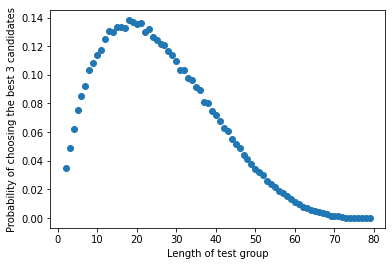

In [ ]:
points=np.array(points)

plt.scatter(points[:,0], points[:,1])
plt.xlabel("Length of test group")
plt.ylabel("Probability of choosing the best 3 candidates")
plt.show()

Get a closer look

In [ ]:
small_range=np.array(range(16,26))
good_points = []
for i in small_range:
  score=0
  z=30
  for j in range(z):
    score+=analyzer_best(stop_point=i)
  good_points.append([i, score/z])

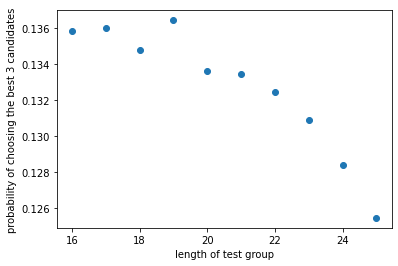

In [ ]:
good_points=np.array(good_points)

plt.scatter(good_points[:,0], good_points[:,1])
plt.xlabel("length of test group")
plt.ylabel("probability of choosing the best 3 candidates")
plt.show()

In [ ]:
small_range=np.array(range(18,22))
good_points = []
for i in small_range:
  score=0
  z=200
  for j in range(z):
    score+=analyzer_best(stop_point=i)
  good_points.append([i, score/z])


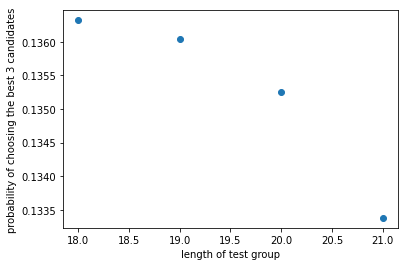

In [ ]:
good_points=np.array(good_points)

plt.scatter(good_points[:,0], good_points[:,1])
plt.xlabel("length of test group")
plt.ylabel("probability of choosing the best 3 candidates")
plt.show()

after that we see that the breaking point is around 18

## Analitycy

In [ ]:
#create 5000 groups from normal distribution to get breaking point of the mean best 1%
m = np.random.normal(0,1)
s = random.uniform(0.8, 1.5)
analizers =np.random.normal(m,s,80)

for i in range(4999):
  m = np.random.normal(0,1)
  s = random.uniform(0.8, 1.5)
  analytics = np.random.normal(m,s,80)
  analizers = np.concatenate([analizers,analytics])

analizers_1best_scr = sorted(analizers)[-6000]

In [ ]:
#Create new array with 5000 groups of analytics because we dont want to interrupt the clarity of 
m = np.random.normal(0,1)
s = random.uniform(0.8, 1.5)
analizers =np.random.normal(m,s,80)

for i in range(4999):
  m = np.random.normal(0,1)
  s = random.uniform(0.8, 1.5)
  analytics = np.random.normal(m,s,80)
  analizers = np.concatenate([analizers,analytics])
analizers = analizers.reshape(5000,80)


In [ ]:
def best_finder(group, point=analizers_1best_scr, stop_point=19):
  """
  :param group: the group we are working on
  :param point: breaking point of hiring candidates from the first part(test) group
  :param stop_point: len of first part(test) group
  :return: 1 if in chosen group are best candidates
  """
  breaking_point = sorted(group)[-3]
  temp = group[:stop_point]
  chosens = temp[temp > point]
  m1 = np.mean(temp)
  s1 = statistics.stdev(temp)
  analytics2 = np.random.normal(m1, s1, 800)
  breaking_point2 = sorted(analytics2)[-30]
  test = group[stop_point:]
  chosens = np.append(chosens, test[test >= breaking_point2])

  if len(chosens) >= 3 and sum(chosens[:3]) == sum(sorted(group)[-3:]):
    return 1
  else:
    return 0

In [ ]:
score_analz={}
for j in range(19,24): 
  scoreanalz=[]
  for i in range(5000):
    scoreanalz.append(best_finder(analizers[i],stop_point = j))
  score_analz[j]=Counter(scoreanalz)
score_analz

In [ ]:
scoreanalz=0
for i in range(5000):
  scoreanalz+=(best_finder(analizers[i],stop_point = 19))

pi = scoreanalz/50
pi

10.58

Pi = 32.54

In [ ]:
def best_group(group,point=analizers_1best_scr, stop_point=19):
  
  breaking_point = sorted(group)[-3]
  temp=group[:stop_point]
  chosens = temp[temp>point]
  high=max(temp)
  m1 = np.mean(temp)
  s1 = statistics.stdev(temp)
  analytics2 = np.random.normal(m1,s1,800)
  breaking_point2 = sorted(analytics2)[-30]
  test = group[stop_point:]
  boundary = (breaking_point2 or high)
  chosens = np.append(chosens, test[test>=boundary])

  if len(chosens) == 0:
    chosens = group[-3:]
  elif len(chosens) == 1:
    z = group[-3:]
    if len(z[z>= boundary])>=1 :
      chosens = group[-3:]
    else:
      chosens = np.append(chosens, group[-2:])
  elif len(chosens) == 2:
    if group[-1] < boundary:
      chosens = np.append(chosens,group[-1])
    elif group[-2] < boundary:
      chosens = np.append(chosens,group[-2])
    elif group[-3] < boundary:
      chosens = np.append(chosens,group[-3])    
  return chosens[:3]  

## Programistki

In [ ]:
m = np.random.normal(0,1)
s = random.uniform(0.8, 1.5)
progr =np.random.normal(m,s,100)

for i in range(4999):
  m = np.random.normal(0,1)
  s = random.uniform(0.8, 1.5)
  progrs = np.random.normal(m,s,100)
  progr = np.concatenate([progr,progrs])

In [ ]:
progrs_1best_scr = sorted(progr)[-5000]
progrs_2best_scr = sorted(progr)[-5000*2]
progrs_3best_scr = sorted(progr)[-5000*3]
progrs_4best_scr = sorted(progr)[-5000*4]
progrs_5best_scr = sorted(progr)[-5000*5]
progrs_6best_scr = sorted(progr)[-5000*6]
progrs_7best_scr = sorted(progr)[-5000*7]
progrs_8best_scr = sorted(progr)[-5000*8]
progrs_9best_scr = sorted(progr)[-5000*9]
progrs_10best_scr = sorted(progr)[-50000]
progrs_12best_scr = sorted(progr)[-5000*12]
progrs_15best_scr = sorted(progr)[-5000*15]
progrs_17best_scr = sorted(progr)[-5000*17]
progrs_20best_scr = sorted(progr)[-5000*20]


In [ ]:
m = np.random.normal(0,1)
s = random.uniform(0.8, 1.5)
progr =np.random.normal(m,s,100)

for i in range(4999):
  m = np.random.normal(0,1)
  s = random.uniform(0.8, 1.5)
  progrs = np.random.normal(m,s,100)
  progr = np.concatenate([progr,progrs])

progr = progr.reshape(5000,100)

In [ ]:
def mean_group(group, stop_point=29,point = progrs_1best_scr, x = -405):
  temp=group[:stop_point]
  chosens = temp[temp>point]
  m1 = np.mean(temp)
  s1 = statistics.stdev(temp)
  analytics2 = np.random.normal(m1,s1,5000)
  breaking_point2 = sorted(analytics2)[x]
  test = group[stop_point:]
  chosens = np.append(chosens, test[test>=breaking_point2])

  if len(chosens) == 0:
    chosens = test[-3:]
  elif len(chosens) == 1:
    z = test[:3]
    if len(z[z>= breaking_point2])>=1 :
      chosens = test[-3:]
    else:
      chosens = np.append(chosens, test[-2:])
  elif len(chosens) == 2:
    if test[-1] < breaking_point2:
      chosens = np.append(chosens,test[-1])
    elif test[-2] < breaking_point2:
      chosens = np.append(chosens,test[-2])
    elif test[-3] < breaking_point2:
      chosens = np.append(chosens,test[-3])    
  return chosens[:3]

In [ ]:
score7=0
for i in range(5000):
  score7+=sum(mean_group(progr[i]))/3

o = score7/5000
o

1.962479089121188

## Testerzy

In [ ]:
#
m = np.random.normal(0,1)
s = random.uniform(0.8, 1.5)
group_test = np.random.normal(m,s,120)

for i in range(4999):
  m = np.random.normal(0,1)
  s = random.uniform(0.8, 1.5)
  testers = np.random.normal(m,s,120)
  group_test = np.concatenate([group_test,testers])

In [ ]:
#
testers_10best_scr = sorted(group_test)[-60000]
testers_9best_scr = sorted(group_test)[-6000*9]
testers_8best_scr = sorted(group_test)[-6000*8]
testers_7best_scr = sorted(group_test)[-6000*7]
testers_6best_scr = sorted(group_test)[-6000*6]
testers_5best_scr = sorted(group_test)[-30000]
testers_4best_scr = sorted(group_test)[-24000]
testers_3best_scr = sorted(group_test)[-18000]
testers_2best_scr = sorted(group_test)[-12000]
testers_1best_scr = sorted(group_test)[-6000]

In [ ]:
#
m = np.random.normal(0,1)
s = random.uniform(0.8, 1.5)
group = np.random.normal(m,s,120)

for i in range(4999):
  m = np.random.normal(0,1)
  s = random.uniform(0.8, 1.5)
  testers = np.random.normal(m,s,120)
  group = np.concatenate([group,testers])
group = group.reshape(5000,120)

In [ ]:
def percent_finder6(group,point=testers_1best_scr, stop_point=47, prc=-480):
  
  breaking_point = sorted(group)[-12]
  temp=group[:stop_point]
  chosens = temp[temp>point]
  high=max(temp)
  m1 = np.mean(temp)
  s1 = statistics.stdev(temp)
  analytics2 = np.random.normal(m1,s1,4800)
  breaking_point2 = sorted(analytics2)[prc]
  test = group[stop_point:]
  chosens = np.append(chosens, test[test>=breaking_point2 ])
  boundary = breaking_point2

  if len(chosens) == 0:
    chosens = group[-3:]
  elif len(chosens) == 1:
    z = group[-3:]
    if len(z[z >= boundary])>= 1:
      chosens = group[-3:]
    else:
      chosens = np.append(chosens, group[-2:])
  elif len(chosens) == 2:
    if group[-1] < boundary:
      chosens = np.append(chosens,group[-1])
    elif group[-2] < boundary:
      chosens = np.append(chosens,group[-2])
    elif group[-3] < boundary:
      chosens = np.append(chosens,group[-3])    
  

  if len(chosens)>=3 and chosens[0]>=breaking_point and chosens[1]>=breaking_point and chosens[2]>=breaking_point:
    return 1
  else:
    return 0

In [ ]:
score6=[]
for i in range(5000):
  score6.append(percent_finder6(group[i],prc=-400))
Counter(score6)

Counter({0: 1022, 1: 3978})

In [ ]:
p =Counter(score6)[1]
p=p/50
p

2.28

In [ ]:
def percent_group(group,point=testers_1best_scr, stop_point=47):
  
  breaking_point = sorted(group)[-12]
  temp=group[:stop_point]
  chosens = temp[temp>point]
  high=max(temp)
  m1 = np.mean(temp)
  s1 = statistics.stdev(temp)
  analytics2 = np.random.normal(m1,s1,4800)
  breaking_point2 = sorted(analytics2)[-480]
  test = group[stop_point:]
  chosens = np.append(chosens, test[test>=breaking_point2 ])
  boundary = breaking_point2

  if len(chosens) == 0:
    chosens = group[-3:]
  elif len(chosens) == 1:
    z=group[-3:]
    if len(z[z>= boundary]) >= 1:#jesli liczba znajduje sie w 3 ostatnich to musimy wziac 3 ostatnie
      chosens = group[-3:]
    else:
      chosens = np.append(chosens, group[-2:])
  elif len(chosens) == 2:
    if group[-1] < boundary:
      chosens = np.append(chosens,group[-1])
    elif group[-2] < boundary:
      chosens = np.append(chosens,group[-2])
    elif group[-3] < boundary:
      chosens = np.append(chosens,group[-3])    
  return chosens[:3]  

# Zyski

In [ ]:
b = []
for d in range(1000):
  m = np.random.normal(0,1)
  s = random.uniform(0.8, 1.5)

  analizers =np.random.normal(m,s,80)
  programmers = np.random.normal(m,s,100)
  testers = np.random.normal(m,s,120)

  my_analizers = best_group(analizers)
  my_programmers = mean_group(programmers)
  my_testers = percent_group(testers)

  lam = max(0.5,2.5-min(my_analizers))
  price = rng.exponential(lam)
  value = rng.exponential(abs(sum(my_programmers)))
  b.append(value-price)

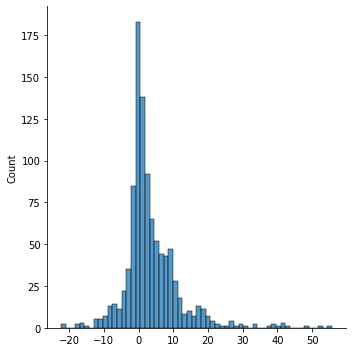

In [ ]:
sns.displot(b,)

In [ ]:
  m = np.random.normal(0,1)
  s = random.uniform(0.8, 1.5)

  analizers =np.random.normal(m,s,80)
  programmers = np.random.normal(m,s,100)
  testers = np.random.normal(m,s,120)

  my_analizers = best_group(analizers)
  my_programmers = mean_group(programmers)
  my_testers = percent_group(testers)

In [ ]:
f= []
while len(f)<3:
  m = np.random.normal(0,1)
  s = random.uniform(0.8, 1.5)

  analizers =np.random.normal(m,s,80)
  programmers = np.random.normal(m,s,100)
  testers = np.random.normal(m,s,120)

  my_analizers = best_group(analizers)
  my_programmers = mean_group(programmers)
  my_testers = percent_group(testers)

  lam = max(0.5,2.5-min(my_analizers))
  price = rng.exponential(lam)
  value = rng.exponential(abs(sum(my_programmers)))
  if value-price >60:
    f.append([value, price])
f

[[64.508788730552, 0.5897454737773173],
 [78.60398367767597, 0.3307980548522377],
 [65.85096972626407, 0.12854626921520218]]

In [ ]:
def get_order(m=m,s=s,analizers=my_analizers,programmers=my_programmers,testers=my_testers, efficience=100000):
  orders = []
  lam = max(0.5,2.5-min(my_analizers))
  prices = rng.exponential(lam,efficience//10)
  price_pick = sorted(prices)[10]
  values = rng.exponential(abs(sum(my_programmers)),efficience)
  value_pick = sorted(values)[-10]

  while len(orders)<3:
    price = rng.exponential(lam)
    value = rng.exponential(abs(sum(my_programmers)))
    if price < 1 and value-price > value_pick-price_pick:
      orders.append([value, price])
  return orders


In [ ]:
def detection(value, tester):
  chance = int.from_bytes(os.urandom(8), byteorder="big") / ((1 << 64) - 1)
  prob = scipy.stats.norm.cdf(i)
  if prob > chance:
    return value
  else:
    return 0


In [ ]:
orders = sorted(get_order(), key=lambda x: x[0])

In [ ]:
def profit(orders=orders, testers=sorted(my_testers)):
  profits = 0
  expenses = sum(x[1] for x in orders)
  for x in range(3):
    profits += detection(orders[x][0],testers[x])
  return profits-expenses

In [ ]:
z= profit()
z

443.4414341445283

In [ ]:
his = []

for d in range(1000):
  m1 = np.random.normal(0,1)
  s1 = random.uniform(0.8, 1.5)

  analizers1 =np.random.normal(m,s,80)
  programmers1 = np.random.normal(m,s,100)
  testers1 = np.random.normal(m,s,120)

  my_analizers = best_group(analizers1)
  my_programmers = mean_group(programmers1)
  my_testers = percent_group(testers1)

  orders = sorted(get_order(m=m1,s=s1,analizers=my_analizers,programmers=my_programmers,testers=my_testers, efficience=10000), key=lambda x: x[0])

  his.append(profit(orders,sorted(my_testers)))
  print(d)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

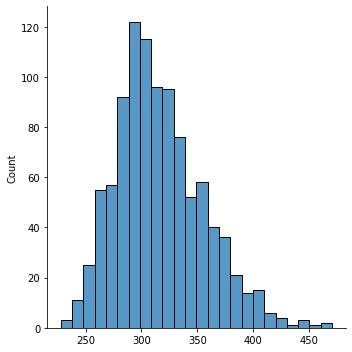

In [ ]:
sns.displot(his)

In [ ]:
his2 = []#for better efficience
for d in range(1000):
  m1 = np.random.normal(0,1)
  s1 = random.uniform(0.8, 1.5)

  analizers1 =np.random.normal(m,s,80)
  programmers1 = np.random.normal(m,s,100)
  testers1 = np.random.normal(m,s,120)

  my_analizers = best_group(analizers1)
  my_programmers = mean_group(programmers1)
  my_testers = percent_group(testers1)

  orders = sorted(get_order(m=m1,s=s1,analizers=my_analizers,programmers=my_programmers,testers=my_testers, efficience=50000), key=lambda x: x[0])

  his2.append(profit(orders,sorted(my_testers)))
  print(d)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

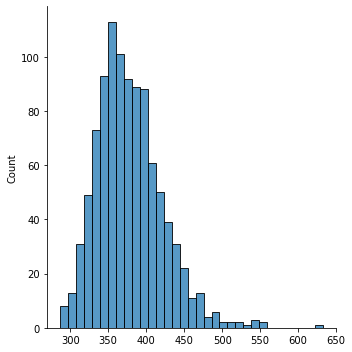

In [ ]:
sns.displot(his2)

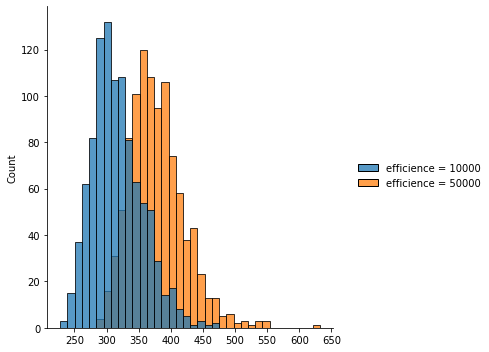

In [ ]:
data = pd.DataFrame([his,his2], index = ['efficience = 10000', 'efficience = 50000'])
sns.displot(data.T)


In [ ]:
losses = 0
for d in range(1000):
  m1 = np.random.normal(0,1)
  s1 = random.uniform(0.8, 1.5)

  analizers1 =np.random.normal(m,s,80)
  programmers1 = np.random.normal(m,s,100)
  testers1 = np.random.normal(m,s,120)

  my_analizers = best_group(analizers1)
  my_programmers = mean_group(programmers1)
  my_testers = percent_group(testers1)

  orders = sorted(get_order(m=m1,s=s1,analizers=my_analizers,programmers=my_programmers,testers=my_testers, efficience=5000), key=lambda x: x[0])
  print(str(d)+' / '+str(1000)+'   '+ 'Lost '+ str(losses) +' times. ')

  if profit(orders,sorted(my_testers))<0:
    losses+=1
losses/1000


0 / 1000   Lost 0 times. 
1 / 1000   Lost 0 times. 
2 / 1000   Lost 0 times. 
3 / 1000   Lost 0 times. 
4 / 1000   Lost 0 times. 
5 / 1000   Lost 0 times. 
6 / 1000   Lost 0 times. 
7 / 1000   Lost 0 times. 
8 / 1000   Lost 0 times. 
9 / 1000   Lost 0 times. 
10 / 1000   Lost 0 times. 
11 / 1000   Lost 0 times. 
12 / 1000   Lost 0 times. 
13 / 1000   Lost 0 times. 
14 / 1000   Lost 0 times. 
15 / 1000   Lost 0 times. 
16 / 1000   Lost 0 times. 
17 / 1000   Lost 0 times. 
18 / 1000   Lost 0 times. 
19 / 1000   Lost 0 times. 
20 / 1000   Lost 0 times. 
21 / 1000   Lost 0 times. 
22 / 1000   Lost 0 times. 
23 / 1000   Lost 0 times. 
24 / 1000   Lost 0 times. 
25 / 1000   Lost 0 times. 
26 / 1000   Lost 0 times. 
27 / 1000   Lost 0 times. 
28 / 1000   Lost 0 times. 
29 / 1000   Lost 0 times. 
30 / 1000   Lost 0 times. 
31 / 1000   Lost 0 times. 
32 / 1000   Lost 0 times. 
33 / 1000   Lost 0 times. 
34 / 1000   Lost 0 times. 
35 / 1000   Lost 0 times. 
36 / 1000   Lost 0 times. 
37 / 1000  

0.0

In [ ]:
losses = 0
income = []
for d in range(3000):
  m1 = np.random.normal(0,1)
  s1 = random.uniform(0.8, 1.5)

  analizers1 =np.random.normal(m,s,80)
  programmers1 = np.random.normal(m,s,100)
  testers1 = np.random.normal(m,s,120)

  my_analizers = best_group(analizers1)
  my_programmers = mean_group(programmers1)
  my_testers = percent_group(testers1)

  orders = sorted(get_order(m=m1,s=s1,analizers=my_analizers,programmers=my_programmers,testers=my_testers, efficience=1000), key=lambda x: x[0])
  p = profit(orders,sorted(my_testers))
  income.append(p)

  if p<0:
    losses+=1


Efficiency = 1000
Lost 0/3000 times. 
Probability of bankruptcy 0.0 %. 
The lowest income 148.15528841891918
The highest income 439.00750169330485


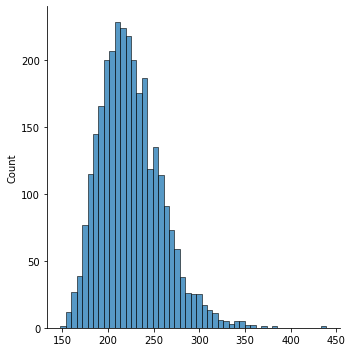

In [ ]:
lowest_income=min(income)
highest_income=max(income)

print('Efficiency = 1000')
print('Lost '+ str(losses) +'/3000 times. ')
print('Probability of bankruptcy '+ str(losses/30) +' %. ')
print('The lowest income '+ str(lowest_income))
print('The highest income '+ str(highest_income))
sns.displot(income)

In [ ]:
losses = 0
for d in range(100000):
  m1 = np.random.normal(0,1)
  s1 = random.uniform(0.8, 1.5)

  analizers1 =np.random.normal(m,s,80)
  programmers1 = np.random.normal(m,s,100)
  testers1 = np.random.normal(m,s,120)

  my_analizers = best_group(analizers1)
  my_programmers = mean_group(programmers1)
  my_testers = percent_group(testers1)

  orders = sorted(get_order(m=m1,s=s1,analizers=my_analizers,programmers=my_programmers,testers=my_testers, efficience=1000), key=lambda x: x[0])
  p = profit(orders,sorted(my_testers))


  if p<0:
    losses+=1

print('Probability of bankruptcy '+ str(losses/1000) +' %. ')

Probability of bankruptcy 0.0 %. 


0